# Part 2: models with additional feature engineering

Part 1 that contains initial EDA and baseline models can be found here: [link]()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#!pip install --upgrade sklearn
#!pip install --upgrade scikit-learn

In [2]:
df = pd.read_csv('raw_data/KaggleV2-May-2016.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#check in every appointment id is unique
len(df.AppointmentID.value_counts()) == len(df)

True

In [100]:
df[50:90]

PatientId  AppointmentID  Gender ScheduledDay AppointmentDay  Age  \
2175  7.126177e+14        5598427       1   2016-04-19     2016-04-29   36   
2202  2.267739e+11        5599889       1   2016-04-19     2016-04-29   63   
2203  9.443975e+12        5413334       0   2016-03-01     2016-04-29   53   
2204  2.426683e+12        5641336       0   2016-04-29     2016-04-29   49   
2205  2.284373e+14        5413193       0   2016-03-01     2016-04-29   36   
2206  3.279773e+14        5412693       0   2016-03-01     2016-04-29   66   
2207  2.349969e+11        5413185       0   2016-03-01     2016-04-29   56   
2208  9.541162e+13        5641584       0   2016-04-29     2016-04-29   47   
2209  1.926218e+12        5641129       0   2016-04-29     2016-04-29   44   
2210  7.484257e+13        5590203       0   2016-04-15     2016-04-29   34   
2211  7.684878e+14        5640882       1   2016-04-29     2016-04-29   45   
2212  7.537279e+13        5636838       0   2016-04-28     2016-04-29   56   
2213  3.423831e+09        5640766       0   2016-04-29     2016-04-29   29   
2214  2.754718e+12        5640760       1   2016-04-29     2016-04-29   55   
2215  9.348286e+13        5641984       1   2016-04-29     2016-04-29    0   
2216  5.699418e+14        5641814       1   2016-04-29     2016-04-29   12   
2217  4.645238e+13        5642782       0   2016-04-29     2016-04-29    0   
2218  5.598295e+11        5634532       1   2016-04-28     2016-04-29   48   
2219  3.475625e+12        5627098       1   2016-04-27     2016-04-29   63   
2220  4.792238e+12        5642687       1   2016-04-29     2016-04-29    4   
2221  5.967568e+14        5615071       0   2016-04-25     2016-04-29   80   
2222  7.531653e+13        5625848       1   2016-04-27     2016-04-29   37   
2201  3.881413e+14        5639438       1   2016-04-29     2016-04-29   30   
2200  7.473797e+13        5566599       0   2016-04-11     2016-04-29   13   
2199  8.719760e+11        5571428       0   2016-04-12     2016-04-29   18   
2198  5.756497e+13        5639292       0   2016-04-29     2016-04-29   75   
2176  6.846000e+13        5637406       1   2016-04-29     2016-04-29   46   
2177  3.642737e+12        5598365       1   2016-04-19     2016-04-29    7   
2178  2.387167e+14        5577532       0   2016-04-13     2016-04-29   17   
2179  4.265757e+11        5507840       1   2016-03-23     2016-04-29    8   
2180  3.287563e+13        5506650       1   2016-03-23     2016-04-29   47   
2181  4.359919e+12        5637641       0   2016-04-29     2016-04-29   46   
2182  8.377597e+13        5507060       1   2016-03-23     2016-04-29   31   
2183  3.649921e+12        5635866       1   2016-04-28     2016-04-29   62   
2184  6.251798e+14        5603619       1   2016-04-20     2016-04-29   25   
2185  2.135579e+11        5603614       0   2016-04-20     2016-04-29   17   
2125  7.823231e+13        5465753       0   2016-03-14     2016-04-29   53   
2186  6.625817e+12        5498507       0   2016-03-22     2016-04-29   55   
2188  3.896263e+10        5578518       0   2016-04-13     2016-04-29    8   
2189  3.939988e+12        5564718       0   2016-04-11     2016-04-29   43   

            Neighbourhood  Scholarship  Hipertension  Diabetes  \
2175             SÃO JOSÉ            0             0         0   
2202            DO QUADRO            0             1         0   
2203         SANTA TEREZA            1             1         0   
2204            DO CABRAL            0             1         0   
2205            DO QUADRO            0             0         0   
2206           VILA RUBIM            0             0         0   
2207            DO CABRAL            0             1         0   
2208            DO QUADRO            0             0         0   
2209            DO QUADRO            0             0         0   
2210           VILA RUBIM            0             0         0   
2211        SANTOS DUMONT            0             0         0   
2212     ILHA DO P

In [6]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [7]:
#convert dates to datetime format getting rid of the hour

from datetime import datetime

df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.ScheduledDay = df.ScheduledDay.apply(lambda x: x.floor('D'))
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.AppointmentDay = df.AppointmentDay.apply(lambda x: x.floor('D'))

In [8]:
#convert gender to numerical values
df['Gender'] = df['Gender'].replace('F', 0)
df['Gender'] = df['Gender'].replace('M', 1)

In [9]:
#check if the conversion went right
df['Gender'].unique()

array([0, 1])

In [10]:
df['No-show'] = df['No-show'].replace('Yes', 1)
df['No-show'] = df['No-show'].replace('No', 0)

In [11]:
#create column containing how many number of days in advance the applointment was scheduled
df['days_in_advance'] =  df.AppointmentDay - df.ScheduledDay
df['days_in_advance'] = df['days_in_advance'].apply(lambda x: x.days)

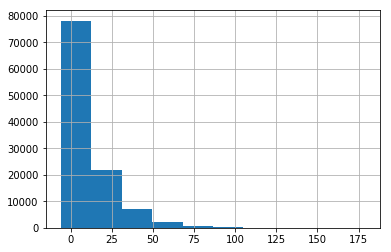

In [12]:
df['days_in_advance'].hist();

In [13]:
#check where the values for days_in_advance are negative: drop these rows
df = df.drop(df[df['days_in_advance'] < 0].index)

In [14]:
df = df.reset_index(drop=True)

In [15]:
#check if it worked: YES
#df['days_in_advance'] < 0

In [16]:
#create column with month of the appointment


df['appointment_month'] =  df.AppointmentDay.apply(lambda x: x.month)

In [17]:
df['appointment_month'].unique()

array([4, 5, 6])

In [18]:
#create column with day of the week of the appointment

df['appointment_day_of_the_week'] =  df.AppointmentDay.apply(lambda x: x.weekday())

In [19]:
df['appointment_day_of_the_week'].unique()

array([4, 1, 0, 2, 3, 5])

## One hot encoding

In [20]:
#create binary values for appointment_month

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
month_category = df["appointment_month"].values.reshape(-1, 1)

In [23]:
encoder = OneHotEncoder(drop='first', categories='auto').fit(month_category)

In [24]:
encoder.categories_

[array([4, 5, 6])]

In [25]:
encoder.get_feature_names(["month_appointment"])

array(['month_appointment_5', 'month_appointment_6'], dtype=object)

In [26]:
ohe = pd.DataFrame(encoder.transform(month_category).toarray(),
                   columns=encoder.get_feature_names(["month_appointment"]))

In [27]:
ohe.columns

Index(['month_appointment_5', 'month_appointment_6'], dtype='object')

In [28]:
df = df.drop(["appointment_month"], axis=1)

In [29]:
df = pd.concat([df, ohe], axis=1, join='inner')

In [30]:
#create categories for appointment_day_of_week

day_of_week_category = df["appointment_day_of_the_week"].values.reshape(-1, 1)

In [31]:
df["appointment_day_of_the_week"].unique()

array([4, 1, 0, 2, 3, 5])

In [32]:
encoder = OneHotEncoder(drop='first', categories='auto').fit(day_of_week_category)

In [33]:
encoder.categories_

[array([0, 1, 2, 3, 4, 5])]

In [34]:
encoder.get_feature_names(["day_of_week_appointment"])

array(['day_of_week_appointment_1', 'day_of_week_appointment_2',
       'day_of_week_appointment_3', 'day_of_week_appointment_4',
       'day_of_week_appointment_5'], dtype=object)

In [35]:
ohe = pd.DataFrame(encoder.transform(day_of_week_category).toarray(),
                   columns=encoder.get_feature_names(["day_of_week_appointment"]))

In [36]:
df = pd.concat([df.drop("appointment_day_of_the_week", axis=1), ohe], axis=1, join='inner')

In [37]:
#df.tail()

## Create 2 more features: number of previous appointments, number of previous no-shows

In [38]:
def get_num_apptmnts_noshows(patient_id, df):
    '''Returns a list of dictionaries with numbers of previous apointments and number
    of previous no-shows for each appintment id'''
    
    df_subset = df[df['PatientId'] == patient_id]
    df_subset = df_subset.sort_values(by='AppointmentDay')
    df_subset = df_subset.reset_index()
    df_subset['number_of_previous_apptms'] = df_subset.index
    
    no_shows = []
    for i in df_subset.index:
        if i == 0:
            no_shows.append(0)
        else:
            df_slice = df_subset.iloc[0:i, :]
            no_shows.append(sum(df_slice['No-show']))
            
    df_subset['number_of_previous_noshows'] = no_shows
    
    subset_dict = df_subset[['AppointmentID', 'number_of_previous_apptms', 'number_of_previous_noshows']].to_dict(orient='index')
        
    return subset_dict



In [39]:
def update_dataframe(df):
    '''Updates dataframe with values for columns number_of_previous_apptms, number_of_previous_noshows'''
    
    #create an array with unique patient ids
    patient_ids = np.unique(df['PatientId'].values)
    
    #get values for previous appointment numbers and previous no-shows
    dict_values = []
    
    counter = 0
    
    
    
    for pid in patient_ids:
        
        if (counter % 500) == 0:
            print("main loop state: ", counter)
            
        dict_values.append(get_num_apptmnts_noshows(pid, df))
        counter += 1
        
    #fill df with nan numbers
    df['number_of_previous_apptms'] = np.nan
    df['number_of_previous_noshows'] = np.nan
    
    counter_2 = 0
    
    
    
    #update the dataframe
    for d in dict_values:
        for v in d.values():
            
            if (counter_2 % 500) == 0:
                print("inner loop state: ", counter_2)
                
            selected_row = df[df['AppointmentID'] == v['AppointmentID']]
            index = selected_row.index
            df.loc[index, 'number_of_previous_apptms'] = v['number_of_previous_apptms']
            df.loc[index, 'number_of_previous_noshows'] = v['number_of_previous_noshows']
            counter_2 += 1
    return df

In [40]:
#test a slice of a dataset
#df_test = update_dataframe(df[201:1000])

In [41]:
#df_test

In [42]:
#test
#df[df['PatientId'] == 476946211846992.0]

In [43]:
#df_test.head()

In [44]:
#patient id to test
#df_test[df_test['PatientId'] == 476946211846992.0]

## Test train split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# sort dataframe by appointment date to perform time series split: 
# we should split according to how recent the data is instead of just a random split

In [47]:
df = df.sort_values(by='AppointmentDay')

In [48]:
df.head()

PatientId  AppointmentID  Gender ScheduledDay AppointmentDay  Age  \
0     2.987250e+13        5642903       0   2016-04-29     2016-04-29   62   
2151  7.257760e+11        5521232       1   2016-03-29     2016-04-29   33   
2152  9.475572e+13        5521230       0   2016-03-29     2016-04-29   50   
2153  3.538755e+13        5523393       0   2016-03-29     2016-04-29   69   
2154  7.324990e+14        5642808       0   2016-04-29     2016-04-29   65   

        Neighbourhood  Scholarship  Hipertension  Diabetes  \
0     JARDIM DA PENHA            0             1         0   
2151      MARIA ORTIZ            0             0         0   
2152      MARIA ORTIZ            0             0         0   
2153      MARIA ORTIZ            0             0         0   
2154      MARIA ORTIZ            0             0         0   

                ...              SMS_received  No-show  days_in_advance  \
0               ...                         0        0                0   
2151            ...                         1        0               31   
2152            ...                         0        0               31   
2153            ...                         1        0               31   
2154            ...                         0        0                0   

      month_appointment_5  month_appointment_6  day_of_week_appointment_1  \
0                     0.0                  0.0                        0.0   
2151                  0.0                  0.0                        0.0   
2152                  0.0                  0.0                        0.0   
2153                  0.0                  0.0                        0.0   
2154                  0.0                  0.0                        0.0   

      day_of_week_appointment_2  day_of_week_appointment_3  \
0                           0.0                        0.0   
2151                        0.0                        0.0   
2152                        0.0                        0.0   
2153                        0.0                        0.0   
2154                        0.0                        0.0   

      day_of_week_appointment_4  day_of_week_appointment_5  
0                           1.0                        0.0  
2151                        1.0                        0.0  
2152                        1.0                        0.0  
2153                        1.0                        0.0  
2154                        1.0                        0.0  

[5 rows x 22 columns]

In [49]:
y = df['No-show']
X = df

#to maintain time order of the appointment date, shuffle is set to False
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [179]:
y.value_counts()

0    88208
1    22314
Name: No-show, dtype: int64

In [183]:
sns.kde(df['SMS_received'], y)

AttributeError: module 'seaborn' has no attribute 'kde'

#### We got X_test_new and X_train new by applying the above function. The results were saved as csv file.

In [51]:
#X_test_new saved to csv file, no need to run this again
#X_test_new = update_dataframe(X_test)

In [52]:
#X_test_new.to_csv('X_test_new.csv')

In [53]:
#X_test_new.to_csv('X_test_new_no_index.csv', index=False)

In [54]:
#dataframe saved to csv, no need to run it

#X_train_new = update_dataframe(X_train)

In [55]:
#X_test_new.to_csv('X_test_new_no_index.csv', index=False)

In [56]:
#X_train_new.to_csv('X_train_new.csv')
#X_train_new.to_csv('X_train_new_no_index.csv', index=False)

In [57]:
#save y_test and y_train

In [58]:
#y_train.to_csv('y_train.csv')
#y_train.to_csv('y_train_no_index.csv', index=False)

#y_test.to_csv('y_test.csv')
#y_test.to_csv('y_test_no_index.csv', index=False)

#### Retrieving data from csv

In [59]:
X_train_new = pd.read_csv('X_train_new.csv', index_col=0)
X_test_new = pd.read_csv('X_test_new.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', header=None, index_col=0)
y_test = pd.read_csv('y_test.csv', header=None, index_col=0)

In [60]:
len(X_train_new) == len(y_train)

True

In [61]:
len(X_test_new) == len(y_test)

True

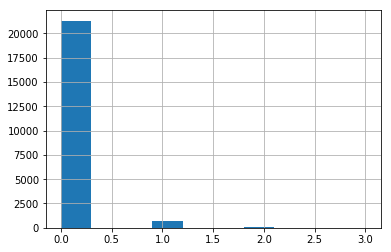

In [62]:
X_test_new['number_of_previous_noshows'].hist();

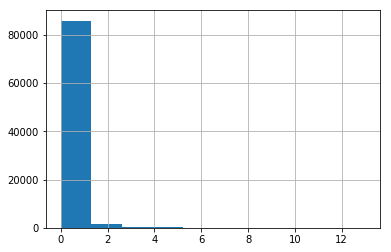

In [63]:
X_train_new['number_of_previous_noshows'].hist();

## Doublecheck correlation before applying classification models

In [64]:
X_train_new.corr()

PatientId  AppointmentID    Gender       Age  \
PatientId                    1.000000       0.003465  0.008613 -0.002170   
AppointmentID                0.003465       1.000000  0.023706 -0.025672   
Gender                       0.008613       0.023706  1.000000 -0.106640   
Age                         -0.002170      -0.025672 -0.106640  1.000000   
Scholarship                 -0.001574       0.026919 -0.117978 -0.090518   
Hipertension                -0.002534       0.013053 -0.056664  0.505453   
Diabetes                     0.001664       0.024921 -0.035967  0.292012   
Alcoholism                   0.011537       0.034725  0.107410  0.097248   
Handcap                     -0.008082       0.015615  0.021890  0.080938   
SMS_received                -0.010508      -0.316046 -0.044995  0.013416   
No-show                     -0.000821      -0.167308 -0.006986 -0.060021   
days_in_advance             -0.000827      -0.836146 -0.029420  0.038627   
month_appointment_5          0.000404      -0.030617 -0.000736 -0.000942   
month_appointment_6         -0.000067       0.208185 -0.001622  0.010642   
day_of_week_appointment_1    0.002524       0.070257 -0.008629  0.008837   
day_of_week_appointment_2   -0.002873       0.109609 -0.001556  0.000059   
day_of_week_appointment_3   -0.004159      -0.041674  0.001369 -0.001294   
day_of_week_appointment_4    0.002759      -0.116663  0.004190 -0.006330   
day_of_week_appointment_5   -0.005519       0.006571 -0.004176  0.015116   
number_of_previous_apptms    0.017249       0.176047  0.079053  0.051612   
number_of_previous_noshows   0.001462       0.119974  0.011599 -0.012958   

                            Scholarship  Hipertension  Diabetes  Alcoholism  \
PatientId                     -0.001574     -0.002534  0.001664    0.011537   
AppointmentID                  0.026919      0.013053  0.024921    0.034725   
Gender                        -0.117978     -0.056664 -0.035967    0.107410   
Age                           -0.090518      0.505453  0.292012    0.097248   
Scholarship                    1.000000     -0.017225 -0.023446    0.033061   
Hipertension                  -0.017225      1.000000  0.432453    0.091636   
Diabetes                      -0.023446      0.432453  1.000000    0.020094   
Alcoholism                     0.033061      0.091636  0.020094    1.000000   
Handcap                       -0.008340      0.083056  0.059680    0.003654   
SMS_received                   0.004539     -0.004178 -0.012454   -0.024171   
No-show                        0.032800     -0.033496 -0.013444   -0.001658   
days_in_advance               -0.032098     -0.018140 -0.029856   -0.040252   
month_appointment_5            0.000915      0.001764 -0.003803   -0.002318   
month_appointment_6           -0.001345      0.000213  0.002843    0.001149   
day_of_week_appointment_1      0.005042      0.005593  0.002179   -0.002960   
day_of_week_appointment_2     -0.002739     -0.004281 -0.001662   -0.002555   
day_of_week_appointment_3     -0.001711      0.002246 -0.005068   -0.003512   
day_of_week_appointment_4      0.000656     -0.004323  0.006461    0.003816   
day_of_week_appointment_5     -0.001530      0.015360  0.008827    0.002625   
number_of_previous_apptms      0.005384     -0.005260 -0.017411    0.156572   
number_of_previous_noshows     0.037535     -0.004271 -0.002728    0.012361   

                             Handcap  SMS_received  \
PatientId                  -0.008082     -0.010508   
AppointmentID               0.015615     -0.316046   
Gender                      0.021890     -0.044995   
Age                         0.080938      0.013416   
Scholarship                -0.008340      0.004539   
Hipertension                0.083056     -0.004178   
Diabetes                    0.059680     -0.012454   
Alcoholism                  0.003654     -0.024171   
Handcap                     1.000000     -0.023413   
SMS_received               -0.023413      1.000000   
No-show               

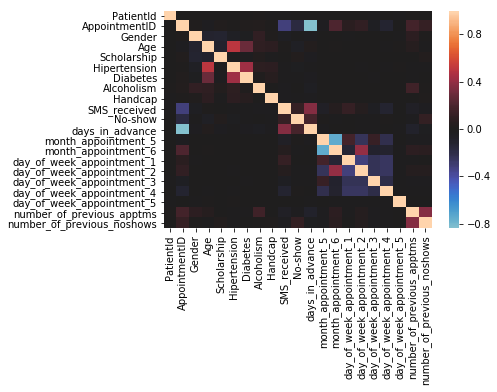

In [65]:
import seaborn as sns
sns.heatmap(X_train_new.corr(), center=0);

## Drop non-numeric features: neibourhoods, dates

In [66]:
X_train_new.head()

PatientId  AppointmentID  Gender ScheduledDay AppointmentDay  Age  \
0     2.987250e+13        5642903       0   2016-04-29     2016-04-29   62   
2151  7.257760e+11        5521232       1   2016-03-29     2016-04-29   33   
2152  9.475572e+13        5521230       0   2016-03-29     2016-04-29   50   
2153  3.538755e+13        5523393       0   2016-03-29     2016-04-29   69   
2154  7.324990e+14        5642808       0   2016-04-29     2016-04-29   65   

        Neighbourhood  Scholarship  Hipertension  Diabetes  \
0     JARDIM DA PENHA            0             1         0   
2151      MARIA ORTIZ            0             0         0   
2152      MARIA ORTIZ            0             0         0   
2153      MARIA ORTIZ            0             0         0   
2154      MARIA ORTIZ            0             0         0   

                 ...              days_in_advance  month_appointment_5  \
0                ...                            0                  0.0   
2151             ...                           31                  0.0   
2152             ...                           31                  0.0   
2153             ...                           31                  0.0   
2154             ...                            0                  0.0   

      month_appointment_6  day_of_week_appointment_1  \
0                     0.0                        0.0   
2151                  0.0                        0.0   
2152                  0.0                        0.0   
2153                  0.0                        0.0   
2154                  0.0                        0.0   

      day_of_week_appointment_2  day_of_week_appointment_3  \
0                           0.0                        0.0   
2151                        0.0                        0.0   
2152                        0.0                        0.0   
2153                        0.0                        0.0   
2154                        0.0                        0.0   

      day_of_week_appointment_4  day_of_week_appointment_5  \
0                           1.0                        0.0   
2151                        1.0                        0.0   
2152                        1.0                        0.0   
2153                        1.0                        0.0   
2154                        1.0                        0.0   

      number_of_previous_apptms  number_of_previous_noshows  
0                           0.0                         0.0  
2151                        0.0                         0.0  
2152                        0.0                         0.0  
2153                        0.0                         0.0  
2154                        0.0                         0.0  

[5 rows x 24 columns]

In [67]:
#drop columns
X_train_new  = X_train_new.drop(['Neighbourhood', 'ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID', 'No-show'], axis=1)
X_test_new = X_test_new.drop(['Neighbourhood', 'AppointmentDay', 'ScheduledDay', 'PatientId', 'AppointmentID', 'No-show'], axis=1)


## SMOTE to correct class imbalance

The ratio on no-shows and shows is very unbalances which can affect model performance. We should correct the imbalance creating equal samples to compensate for lack of no-show data

In [68]:
#!pip install imblearn

In [69]:
from imblearn.over_sampling import SMOTE

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [70]:
smt = SMOTE()
X_train_new, y_train = smt.fit_resample(X_train_new, y_train) 

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
test_imbalance_df = pd.DataFrame(y_train)

In [72]:
test_imbalance_df.head()

0
0  0
1  0
2  0
3  0
4  0

In [73]:
test_imbalance_df[0].value_counts()

1    70196
0    70196
Name: 0, dtype: int64

In [74]:
type(y_train)

numpy.ndarray

## Apply random forests

In [75]:
rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_new, y_train)
print(rfc)
print('Training set score:', rfc.score(X_train_new, y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training set score: 0.9662160237050544


In [76]:
print("Report:")
y_true, y_pred = y_test, rfc.predict(X_test_new)
print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred)

Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87     18012
           1       0.32      0.20      0.25      4093

    accuracy                           0.77     22105
   macro avg       0.58      0.55      0.56     22105
weighted avg       0.74      0.77      0.75     22105



array([[16286,  1726],
       [ 3272,   821]])

In [77]:
RFC_score = cross_val_score(rfc, X_test_new, y_test, cv=5)
print('\nEach Cross Validated Accuracy: \n', RFC_score)
print("\nOverall Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)\n" % (RFC_score.mean(), RFC_score.std() * 2))




/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 


Each Cross Validated Accuracy: 
 [0.47987336 0.77385798 0.79009274 0.73371041 0.78438914]

Overall Random Forest Classifier Accuracy: 0.71 (+/- 0.24)



### Building the decision tree to compare metrics

In [78]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_split=30) 
tree_clf.fit(X_train_new, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Feature importance

In [79]:
tree_clf.feature_importances_

array([0.00460697, 0.05455844, 0.        , 0.00620035, 0.00304465,
       0.        , 0.00074731, 0.        , 0.61728224, 0.01059416,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11452968, 0.18843621])

In [80]:
pred = tree_clf.predict(X_test_new)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[11825  6187]
 [ 1410  2683]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.76     18012
           1       0.30      0.66      0.41      4093

    accuracy                           0.66     22105
   macro avg       0.60      0.66      0.59     22105
weighted avg       0.78      0.66      0.69     22105



In [81]:
tree_clf_score = cross_val_score(tree_clf, X_test_new, y_test, cv=5)
print('\nEach Cross Validated Accuracy: \n', tree_clf_score)
print("\nOverall Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)\n" % (tree_clf_score.mean(), tree_clf_score.std() * 2))


Each Cross Validated Accuracy: 
 [0.51515152 0.81456355 0.81520018 0.7841629  0.81493213]

Overall Random Forest Classifier Accuracy: 0.75 (+/- 0.23)



## Logistic regression

In [82]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', max_iter=500)
model_log = logreg.fit(X_train_new, y_train)
print(model_log)
print('Training set score:', logreg.score(X_train_new, y_train))

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training set score: 0.6423015556441962


In [83]:
#Predict

y_hat_test = logreg.predict(X_test_new)
y_hat_train = logreg.predict(X_train_new)

In [84]:
y_hat_test

array([0, 0, 0, ..., 0, 0, 0])

#### How many times the classifier was correct for the test set?

In [85]:
residuals = y_test[1] - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0    16439
-1     2962
 1     2704
Name: 1, dtype: int64
 0    0.743678
-1    0.133997
 1    0.122325
Name: 1, dtype: float64


In [86]:
print("Report:")
y_true, y_pred = y_test, logreg.predict(X_test_new)
print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred)

Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     18012
           1       0.32      0.34      0.33      4093

    accuracy                           0.74     22105
   macro avg       0.58      0.59      0.59     22105
weighted avg       0.75      0.74      0.75     22105



array([[15050,  2962],
       [ 2704,  1389]])

In [87]:
LR_score = cross_val_score(logreg, X_test_new, y_test, cv=5)
print('\nEach Cross Validated Accuracy score: \n', LR_score)
print("\nOverall Logistic Regression Accuracy: %0.2f (+/- %0.2f)\n" % (LR_score.mean(), LR_score.std() * 2))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


Each Cross Validated Accuracy score: 
 [0.20171868 0.81207598 0.81474779 0.80904977 0.81515837]

Overall Logistic Regression Accuracy: 0.69 (+/- 0.49)



In [88]:
coef = list(logreg.coef_[0])
coef

[-0.09274181290252222,
 -0.007371022632525732,
 0.021978992588648993,
 -0.04606177397921388,
 0.05344842219741381,
 0.09321961917393888,
 -0.183029235701584,
 0.38852362335794066,
 0.02758343499781696,
 -0.0074817873610936595,
 -0.4818866245790533,
 -0.2544322146206737,
 -0.17766920028622255,
 -0.2639800186183778,
 -0.11757618819586393,
 0.004604800609855958,
 -0.07725986361709454,
 0.5937800800053947]

In [89]:
feature_names = X_test_new.columns
len(feature_names) == len(coef)

True

In [90]:
features = pd.DataFrame()
features['name'] = feature_names
features['coef'] = coef

In [91]:
features

name      coef
0                       Gender -0.092742
1                          Age -0.007371
2                  Scholarship  0.021979
3                 Hipertension -0.046062
4                     Diabetes  0.053448
5                   Alcoholism  0.093220
6                      Handcap -0.183029
7                 SMS_received  0.388524
8              days_in_advance  0.027583
9          month_appointment_5 -0.007482
10         month_appointment_6 -0.481887
11   day_of_week_appointment_1 -0.254432
12   day_of_week_appointment_2 -0.177669
13   day_of_week_appointment_3 -0.263980
14   day_of_week_appointment_4 -0.117576
15   day_of_week_appointment_5  0.004605
16   number_of_previous_apptms -0.077260
17  number_of_previous_noshows  0.593780

In [92]:
#features.sort_values(by='coef')

### Interpretation of coefficients

Continious variables:

- **age**: for every additional year log(odds of no-show) decreases by 0.007
- **number_of_previous_apptms**: for 1 additional number log(odds of no-show) decreases by 0.07
- **days_in_advance**: for every additional day log(odds of no-show) increases by 0.028
- **number_of_previous_noshows** for every additional previous no-show log(odds of no-show) increases by 0.59

Discreet variables:

the presence of feature increases/decreases log(odds of no-show) by coefficient value

Most significant features: number_of_previous_noshows, month_appointment_6, SMS_received 



#### Get p-values for coefficients to determine if drop features:

In [93]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_new)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.648818
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               140392
Model:                          Logit   Df Residuals:                   140374
Method:                           MLE   Df Model:                           17
Date:                Fri, 31 May 2019   Pseudo R-squ.:                 0.06395
Time:                        10:26:31   Log-Likelihood:                -91089.
converged:                       True   LL-Null:                       -97312.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0930      0.012     -7.565      0.000      -0.117      -0.069
x2            -0.0074      0.

Not significant features:  Scholarship, Diabetes, month_appointment_5, day_of_week_appointment_5

## Remove unnecessary features, run Logistic Regression again:

In [94]:
#import again the dataframes
X_train_new = pd.read_csv('X_train_new.csv', index_col=0)
X_test_new = pd.read_csv('X_test_new.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', header=None, index_col=0)
y_test = pd.read_csv('y_test.csv', header=None, index_col=0)

In [95]:
#drop columns
X_train_new  = X_train_new.drop(['Neighbourhood', 'ScheduledDay', 'AppointmentDay', 
                                 'PatientId', 'AppointmentID', 'No-show', 'Scholarship', 'Diabetes', 
                                 'month_appointment_5', 'day_of_week_appointment_5'], axis=1)
X_test_new = X_test_new.drop(['Neighbourhood', 'AppointmentDay', 'ScheduledDay', 
                              'PatientId', 'AppointmentID', 'No-show', 'Scholarship', 'Diabetes', 
                              'month_appointment_5', 'day_of_week_appointment_5'], axis=1)



In [96]:
smt = SMOTE()
X_train_new, y_train = smt.fit_resample(X_train_new, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', max_iter=500)
model_log = logreg.fit(X_train_new, y_train)
print(model_log)
print('Training set score:', logreg.score(X_train_new, y_train))

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training set score: 0.6421021140805744


In [98]:
#Predict

y_hat_test = logreg.predict(X_test_new)
y_hat_train = logreg.predict(X_train_new)

In [99]:
#### How many times the classifier was correct for the test set?

residuals = y_test[1] - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

print("Report:")
y_true, y_pred = y_test, logreg.predict(X_test_new)
print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred)

LR_score = cross_val_score(logreg, X_test_new, y_test, cv=5)
print('\nEach Cross Validated Accuracy score: \n', LR_score)
print("\nOverall Logistic Regression Accuracy: %0.2f (+/- %0.2f)\n" % (LR_score.mean(), LR_score.std() * 2))

coef = list(logreg.coef_[0])
coef

feature_names = X_test_new.columns
len(feature_names) == len(coef)

features = pd.DataFrame()
features['name'] = feature_names
features['coef'] = coef

features

 0    16362
-1     3066
 1     2677
Name: 1, dtype: int64
 0    0.740195
-1    0.138702
 1    0.121104
Name: 1, dtype: float64
Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     18012
           1       0.32      0.35      0.33      4093

    accuracy                           0.74     22105
   macro avg       0.58      0.59      0.58     22105
weighted avg       0.75      0.74      0.74     22105



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


Each Cross Validated Accuracy score: 
 [0.20171868 0.81207598 0.8145216  0.8081448  0.81470588]

Overall Logistic Regression Accuracy: 0.69 (+/- 0.49)



name      coef
0                       Gender -0.123217
1                          Age -0.007556
2                 Hipertension -0.007325
3                   Alcoholism  0.040789
4                      Handcap -0.146144
5                 SMS_received  0.390198
6              days_in_advance  0.027498
7          month_appointment_6 -0.463698
8    day_of_week_appointment_1 -0.244623
9    day_of_week_appointment_2 -0.175504
10   day_of_week_appointment_3 -0.245840
11   day_of_week_appointment_4 -0.096902
12   number_of_previous_apptms -0.078217
13  number_of_previous_noshows  0.601255

### Interpretation of coefficients

Continious variables:

- **age**: for every additional year log(odds of no-show) decreases by 0.007
- **number_of_previous_apptms**: for 1 additional number log(odds of no-show) decreases by 0.07
- **days_in_advance**: for every additional day log(odds of no-show) increases by 0.027
- **number_of_previous_noshows** for every additional previous no-show log(odds of no-show) increases by 0.6

Discreet variables:

the presence of feature increases/decreases log(odds of no-show) by coefficient value

Most significant: number_of_previous_noshows, month_appointment_6, SMS_received 

### Dropping the features did not result in significant improvement of the model in terms of accuracy

## Conclusion

Models comparison

| **model**  |  **cv score** |**f1 0 / 1**| **precision 0 / 1**  |**recall 0 / 1**   |
|---|---|---|---|---|
| decision trees  |  0.75 | 0.76 / 0.41  | 0.89 / 0.30  |  0.66 / 0.66 |
| random forests  | 0.71  | 0.87 / 0.25  | 0.83 / 0.32  |  0.90 / 0.20 |
|  logistic regression (initial) | 0.69  | 0.84 / 0.33  |  0.85 / 0.32 |  0.84 / 0.34 |
|  logistic regression (dropped features) | 0.69 | 0.84 / 0.33  |  0.85 / 0.32 |  0.83 / 0.35 |

Even though decision trees seems to be the best performing algorithm, it is prone to overfitting and cannot be cosidered best.

In [175]:
## Simulate scenario for 1 person:


mario = (1, 30, 0, 0, 0, 0, 14, 1, 0, 1, 0, 0, 0, 2)
m = np.array(mario)
m

array([ 1, 30,  0,  0,  0,  0, 14,  1,  0,  1,  0,  0,  0,  2])

In [176]:
m_df = pd.DataFrame(m).T
m_df

0   1   2   3   4   5   6   7   8   9   10  11  12  13
0   1  30   0   0   0   0  14   1   0   1   0   0   0   2

In [177]:
noshow_mario = logreg.predict_proba(m_df)

In [178]:
print(noshow_mario)

[[0.35471351 0.64528649]]
